<h1 align=center><font size = 5>The Battle of Neighborhoods Week 2</font></h1>
<h1 align=center><font size = 5>Recommending to Start a Business at a Tourist Venue</font></h1>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
!pip install geopy
!pip install bs4
!pip install lxml
import codecs
import lxml

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

     |████████████████████████████████| 112kB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 122kB 2.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4
     |████████████████████████████████| 5.5MB 4.4MB/s eta 0:00:01
Libraries imported.


In [2]:
# send the GET request
#Capstone_TelanganaDataSet = requests.get('https://en.wikipedia.org/wiki/List_of_districts_in_India').text
#!wget https://en.wikipedia.org/wiki/List_of_districts_in_India

# parse data from the html into a beautifulsoup object
#soup = BeautifulSoup(data, 'html.parser')

#f = codecs.open('List_of_districts_in_India', encoding='utf-8')
#html = f.read()
#soup = BeautifulSoup(html, 'html.parser')

## Data Exploration

In [3]:
df = pd.read_excel('Capstone_TelanganaDataSet.xlsx')
print(len(df))
df.head()

739


,State,Code,District,Headquarters,Population(2011),Area(km2),Density(/km2),Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20.0,7,93
1,Andaman and Nicobar,NaN,North and Middle Andaman,Mayabunder,105597,3736.0,28.0,12.6112,92.8317
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89.0,10.7057,92.4875
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213.0,14.6546,77.5563
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275.0,13.1601,79.1556


In [4]:
df = df.rename(columns={'Population(2011)': 'Population', 'Area(km2)': 'Area', 'Density(/km2)': 'Density'})
df.head()

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20.0,7,93
1,Andaman and Nicobar,NaN,North and Middle Andaman,Mayabunder,105597,3736.0,28.0,12.6112,92.8317
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89.0,10.7057,92.4875
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213.0,14.6546,77.5563
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275.0,13.1601,79.1556


In [5]:
df.replace('NaN', np.nan, inplace=True)
df = df.dropna()
print(len(df))
df.head()

713


,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Andaman and Nicobar,NI,Nicobar,Car Nicobar,36842,1841.0,20.0,7,93
2,Andaman and Nicobar,SA,South Andaman,Port Blair,238142,2672.0,89.0,10.7057,92.4875
3,Andhra Pradesh,AN,Anantapur,Anantapur,4083315,19130.0,213.0,14.6546,77.5563
4,Andhra Pradesh,CH,Chittoor,Chittoor,4170468,15152.0,275.0,13.1601,79.1556
5,Andhra Pradesh,EG,East Godavari,Kakinada,5151549,10807.0,477.0,17.2335,81.7226


In [6]:
df_state_pop_area_dens = df[['State', 'Population', 'Area']]
df_state_pop_area_dens.head()

,State,Population,Area
0,Andaman and Nicobar,36842,1841.0
2,Andaman and Nicobar,238142,2672.0
3,Andhra Pradesh,4083315,19130.0
4,Andhra Pradesh,4170468,15152.0
5,Andhra Pradesh,5151549,10807.0


In [7]:
df_state = df_state_pop_area_dens.groupby(['State'], as_index=False).sum()
print(len(df_state))
df_state.head(36)

36


,State,Population,Area
0,Andaman and Nicobar,274984,4513.00
1,Andhra Pradesh,49378776,160205.00
2,Arunachal Pradesh,1686644,88638.00
3,Assam,31469592,85776.00
4,Bihar,103817951,94794.00
5,Chandigarh,1055450,114.00
6,Chhattisgarh,27876986,150163.00
7,Dadra and Nagar Haveli and Daman and Diu (DD),586956,602.00
8,Goa,1457723,3702.00
9,Gujarat,65930328,223864.00


In [8]:
state = df_state.columns
state

Index(['State', 'Population', 'Area'], dtype='object')

## Data Analysis

<BarContainer object of 36 artists>

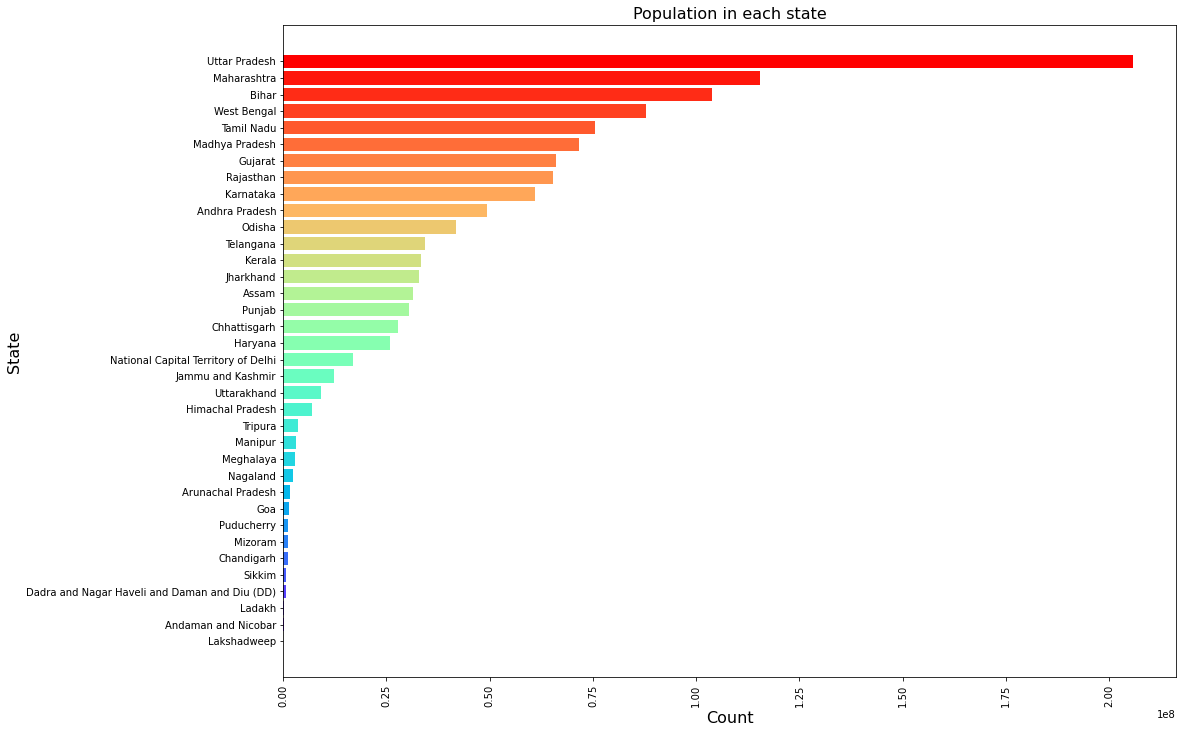

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
df_state.sort_values('Population',inplace=True)
population = df_state['Population']
state = df_state['State']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("State", fontsize = 16)
plt.title("Population in each state", fontsize = 16)
plt.barh(state, population.values, color = colors)

In [10]:
# Total number of states in India
print('The data has {} states'.format(len(df['State'].unique())))

The data has 36 states


In [11]:
print('The states are - ' + str(list(df['State'].unique())))

The states are - ['Andaman and Nicobar', 'Andhra Pradesh', 'Karnataka', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh', 'Dadra and Nagar Haveli and Daman and Diu (DD)', 'Jammu and Kashmir', 'Ladakh', 'Lakshadweep', 'National Capital Territory of Delhi', 'Puducherry', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jharkhand', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu']


In [12]:
# Select the state you want to use to solve the problem.  Telangana is selected for this project
state = input('Enter a State - ')

Enter a State -  Telangana


### Telangana State in India is selected

In [13]:
# Calculate geo co-ordinates of Telangana State, India
geolocator = Nominatim(user_agent="tourist_explorist")
location = geolocator.geocode(state)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + state + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Telangana are 17.8495919, 79.1151663.


In [14]:
# Create data frame for the state
df_user_state = df[df['State']==state].reset_index(drop=True)
df_user_state.head()

,State,Code,District,Headquarters,Population,Area,Density,Latitude,Longitude
0,Telangana,AD,Adilabad,Adilabad,708952,4185.97,171.0,19.6641,78.532
1,Telangana,KB,Komaram Bheem,Asifabad,515835,4300.16,106.0,19.3619,79.293
2,Telangana,BK,Bhadradri Kothagudem,Kothagudem,1304811,8951.00,143.0,17.556,80.617
3,Telangana,HY,Hyderabad,Hyderabad,3441992,4325.29,18172.0,17.385,78.4867
4,Telangana,JL,Jagtial,Jagtial,983414,3043.23,407.0,18.7895,78.912


In [15]:
#map of the State 
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, st, district in zip(df_user_state['Latitude'], df_user_state['Longitude'], df_user_state['State'], df_user_state['District']):
    label = '{}, {}'.format(district, st)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

## Foursquare API

#### Define Foursquare Credentials and Version

In [1]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: Your CLIENT_ID
CLIENT_SECRET:Your CLIENT_SECRET


In [17]:
# Get JSON output for Category results from Foursquare API
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)

category_results = requests.get(url).json()
category_results

{'meta': {'code': 200, 'requestId': '5fd4797441131e59a6f1fc4f'},
 'response': {'categories': [{'id': '4d4b7104d754a06370d81259',
    'name': 'Arts & Entertainment',
    'pluralName': 'Arts & Entertainment',
    'shortName': 'Arts & Entertainment',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
     'suffix': '.png'},
    'categories': [{'id': '56aa371be4b08b9a8d5734db',
      'name': 'Amphitheater',
      'pluralName': 'Amphitheaters',
      'shortName': 'Amphitheater',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4fceea171983d5d06c3e9823',
      'name': 'Aquarium',
      'pluralName': 'Aquariums',
      'shortName': 'Aquarium',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
       'suffix': '.png'},
      'categories': []},
     {'id': '4bf58dd8d48988d1e1931735',
      'name': 'A

In [18]:
# List of main categories and sub-categories present in Foursquare API

categories = len(category_results['response']['categories'])

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    print(venues)
    for j in range(len(category_results['response']['categories'][i]['categories'])):
        sub_venues = category_results['response']['categories'][i]['categories'][j]['name']
        print('\t\t' + sub_venues)

Arts & Entertainment
		Amphitheater
		Aquarium
		Arcade
		Art Gallery
		Bowling Alley
		Casino
		Circus
		Comedy Club
		Concert Hall
		Country Dance Club
		Disc Golf
		Escape Room
		Exhibit
		General Entertainment
		Go Kart Track
		Historic Site
		Karaoke Box
		Laser Tag
		Memorial Site
		Mini Golf
		Movie Theater
		Museum
		Music Venue
		Pachinko Parlor
		Performing Arts Venue
		Pool Hall
		Public Art
		Racecourse
		Racetrack
		Roller Rink
		Salsa Club
		Samba School
		Stadium
		Theme Park
		Tour Provider
		VR Cafe
		Water Park
		Zoo
College & University
		College Academic Building
		College Administrative Building
		College Auditorium
		College Bookstore
		College Cafeteria
		College Classroom
		College Gym
		College Lab
		College Library
		College Quad
		College Rec Center
		College Residence Hall
		College Stadium
		College Theater
		Community College
		Fraternity House
		General College & University
		Law School
		Medical School
		Sorority House
		Student Center
		Trade School
		U

In [19]:
# Print main categories from Four Square API
all_categories = {}

for i in range(categories):
    venues = category_results['response']['categories'][i]['name']
    all_categories[venues] = i

print(all_categories)

{'Arts & Entertainment': 0, 'College & University': 1, 'Event': 2, 'Food': 3, 'Nightlife Spot': 4, 'Outdoors & Recreation': 5, 'Professional & Other Places': 6, 'Residence': 7, 'Shop & Service': 8, 'Travel & Transport': 9}


## Select Required Categories to Solve the Problem

In [20]:
tourist_category = []
business_category = []

req_categories = ['Arts & Entertainment', 'Nightlife Spot', 'Outdoors & Recreation']
req_categories2 = ['Food', 'Shop & Service', 'Travel & Transport']


for i in req_categories:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    tourist_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        tourist_category.append(sub_venues)

for i in req_categories2:
    key = all_categories.get(i)
    venues = category_results['response']['categories'][key]['name']
    business_category.append(venues)
    for j in range(len(category_results['response']['categories'][key]['categories'])):
        sub_venues = category_results['response']['categories'][key]['categories'][j]['name']
        business_category.append(sub_venues)

In [21]:
#remove unwanted categories from tourist list
tourist_category.remove('Lounge')
tourist_category.remove('Movie Theater')
tourist_category.remove('Bar')

#remove unwanted categories from business list
business_category.remove('Bus Station')
business_category.remove('ATM')
business_category.remove('Train Station')
business_category.remove('Bus Stop')
business_category.remove('Light Rail Station')
business_category.remove('Toll Booth')
business_category.remove('Toll Plaza')
business_category.remove('Tram Station')

## Get Number of Venues in each district of Telangana and Identify Unique categories

In [22]:
LIMIT = 50

def getNearbyVenues_tourist(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(tourist_category)]
    
    return(nearby_venues)

In [23]:
state_venues = getNearbyVenues_tourist(names=df_user_state['District'],
                                   latitudes=df_user_state['Latitude'],
                                   longitudes=df_user_state['Longitude']
                                  )

Adilabad
Komaram Bheem
Bhadradri Kothagudem
Hyderabad
Jagtial
Jangaon
Jayashankar Bhupalpally
Jogulamba Gadwal
Kamareddy
Karimnagar
Khammam
Mahabubabad
Mahbubnagar
Mancherial
Medak
Medchal Malkajgiri
Mulugu
Narayanpet
Nagarkurnool
Nirmal
Nizamabad
Peddapalli
Rajanna Sircilla
Ranga Reddy
Sangareddy
Siddipet
Suryapet
Vikarabad
Wanaparthy
Warangal Urban
Warangal Rural
Yadadri Bhuvanagiri


In [24]:
print(state_venues.shape)
state_venues

(35, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
34,Hyderabad,17.3850,78.4867,Necklace Road,17.419384,78.465307,Scenic Lookout
36,Hyderabad,17.3850,78.4867,Lamakaan,17.421017,78.447474,Performing Arts Venue
55,Hyderabad,17.3850,78.4867,Rain Lounge,17.425615,78.420337,Nightclub
58,Hyderabad,17.3850,78.4867,KBR Park,17.425369,78.425063,Park
62,Hyderabad,17.3850,78.4867,Qutub Shahi Tombs,17.394737,78.409919,Historic Site
63,Hyderabad,17.3850,78.4867,Heart Cup Coffee,17.459794,78.368608,Nightclub
87,Jayashankar Bhupalpally,18.4293,79.8635,Laknavaram Lake,18.163511,80.076500,Lake
88,Jayashankar Bhupalpally,18.4293,79.8635,laknavaram lake,18.159543,80.080777,Lake
93,Jogulamba Gadwal,16.2337,77.8081,beechpalli,16.161265,77.929067,River
105,Kamareddy,18.3205,78.3370,Medak Church,18.052768,78.266855,Historic Site


In [25]:
all_venues = state_venues['Venue'].tolist()
len(all_venues)

35

In [26]:
no_venues_in_district = state_venues.groupby('District', as_index=False).count()
no_venues_in_district = no_venues_in_district[['District','Venue']]
no_venues_in_district.rename(columns={'Venue':'No of Venues'}, inplace=True)
no_venues_in_district

,District,No of Venues
0,Hyderabad,6
1,Jayashankar Bhupalpally,2
2,Jogulamba Gadwal,1
3,Kamareddy,1
4,Medak,1
5,Medchal Malkajgiri,6
6,Mulugu,1
7,Ranga Reddy,1
8,Sangareddy,7
9,Vikarabad,1


In [27]:
max_no_of_venues = no_venues_in_district['No of Venues'].max()
max_no_of_venues

7

<BarContainer object of 14 artists>

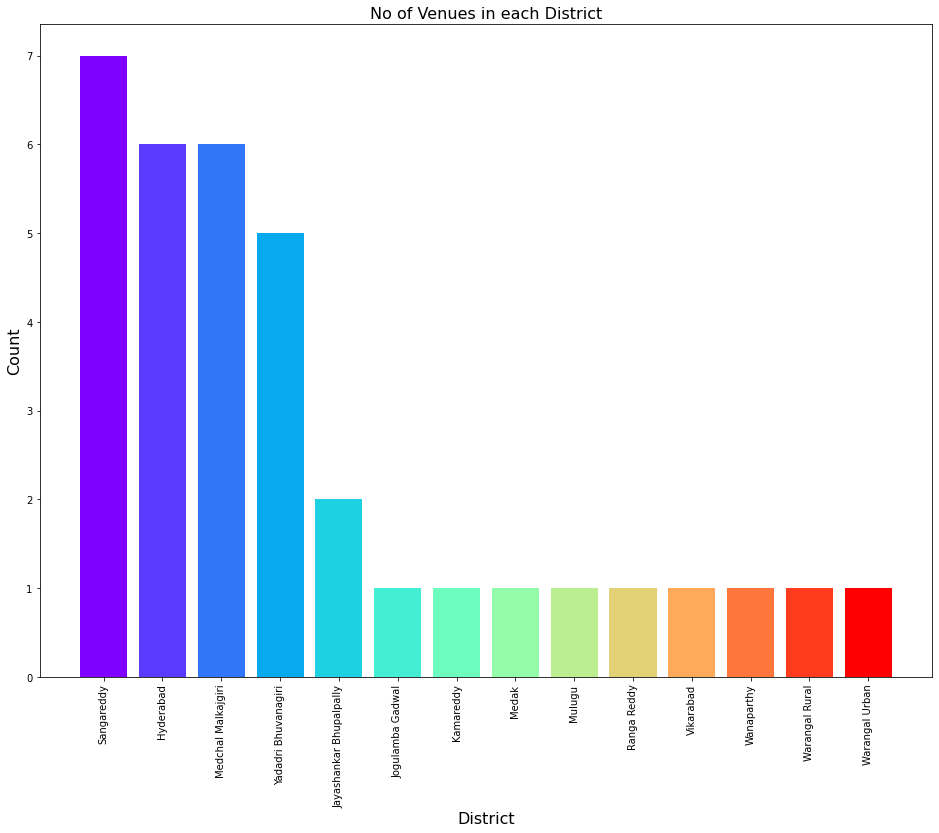

In [28]:
no_venues_in_district.sort_values('No of Venues', ascending=False, inplace=True)
venues = no_venues_in_district['No of Venues']
district = no_venues_in_district['District']


colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Venues in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

In [29]:
print('There are {} uniques categories.'.format(len(state_venues['Venue Category'].unique())))

There are 9 uniques categories.


In [30]:
#print unique venue categories
state_venues['Venue Category'].unique()

array(['Scenic Lookout', 'Performing Arts Venue', 'Nightclub', 'Park',
       'Historic Site', 'Lake', 'River', 'Outdoors & Recreation',
       'General Entertainment'], dtype=object)

## Perform One Hot Encoding and Analyze each District

In [31]:
# one hot encoding
state_venues_onehot = pd.get_dummies(state_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
state_venues_onehot['District'] = state_venues['District'] 

# move neighborhood column to the first column
fixed_columns = [state_venues_onehot.columns[-1]] + list(state_venues_onehot.columns[:-1])
state_venues_onehot = state_venues_onehot[fixed_columns]

state_venues_onehot.head()

,District,General Entertainment,Historic Site,Lake,Nightclub,Outdoors & Recreation,Park,Performing Arts Venue,River,Scenic Lookout
34,Hyderabad,0,0,0,0,0,0,0,0,1
36,Hyderabad,0,0,0,0,0,0,1,0,0
55,Hyderabad,0,0,0,1,0,0,0,0,0
58,Hyderabad,0,0,0,0,0,1,0,0,0
62,Hyderabad,0,1,0,0,0,0,0,0,0


In [32]:
state_venues_onehot.shape

(35, 10)

In [33]:
state_venues_grouped = state_venues_onehot.groupby('District').mean().reset_index()
state_venues_grouped

,District,General Entertainment,Historic Site,Lake,Nightclub,Outdoors & Recreation,Park,Performing Arts Venue,River,Scenic Lookout
0,Hyderabad,0.0,0.166667,0.0,0.333333,0.000000,0.166667,0.166667,0.0,0.166667
1,Jayashankar Bhupalpally,0.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,Jogulamba Gadwal,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
3,Kamareddy,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,Medak,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
5,Medchal Malkajgiri,0.0,0.166667,0.0,0.333333,0.000000,0.166667,0.166667,0.0,0.166667
6,Mulugu,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
7,Ranga Reddy,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
8,Sangareddy,0.0,0.142857,0.0,0.285714,0.142857,0.142857,0.142857,0.0,0.142857
9,Vikarabad,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000


In [34]:
state_venues_grouped.shape

(14, 10)

In [35]:
num_top_venues = max_no_of_venues

for hood in state_venues_grouped['District']:
    print("----"+hood+"----")
    temp = state_venues_grouped[state_venues_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Hyderabad----
                   venue  freq
0              Nightclub  0.33
1          Historic Site  0.17
2                   Park  0.17
3  Performing Arts Venue  0.17
4         Scenic Lookout  0.17
5  General Entertainment  0.00
6                   Lake  0.00


----Jayashankar Bhupalpally----
                   venue  freq
0                   Lake   1.0
1  General Entertainment   0.0
2          Historic Site   0.0
3              Nightclub   0.0
4  Outdoors & Recreation   0.0
5                   Park   0.0
6  Performing Arts Venue   0.0


----Jogulamba Gadwal----
                   venue  freq
0                  River   1.0
1  General Entertainment   0.0
2          Historic Site   0.0
3                   Lake   0.0
4              Nightclub   0.0
5  Outdoors & Recreation   0.0
6                   Park   0.0


----Kamareddy----
                   venue  freq
0          Historic Site   1.0
1  General Entertainment   0.0
2                   Lake   0.0
3              Nightclub   0.0
4 

## Put this into a pandas dataframe

In [36]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
#create the new dataframe and display the top 10 venues for each district

num_top_venues = max_no_of_venues

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue Category'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue Category'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = state_venues_grouped['District']

for ind in np.arange(state_venues_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(state_venues_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted.head()

,District,1st Most Common Venue Category,2nd Most Common Venue Category,3rd Most Common Venue Category,4th Most Common Venue Category,5th Most Common Venue Category,6th Most Common Venue Category,7th Most Common Venue Category
0,Hyderabad,Nightclub,Scenic Lookout,Performing Arts Venue,Park,Historic Site,River,Outdoors & Recreation
1,Jayashankar Bhupalpally,Lake,Scenic Lookout,River,Performing Arts Venue,Park,Outdoors & Recreation,Nightclub
2,Jogulamba Gadwal,River,Scenic Lookout,Performing Arts Venue,Park,Outdoors & Recreation,Nightclub,Lake
3,Kamareddy,Historic Site,Scenic Lookout,River,Performing Arts Venue,Park,Outdoors & Recreation,Nightclub
4,Medak,Historic Site,Scenic Lookout,River,Performing Arts Venue,Park,Outdoors & Recreation,Nightclub


In [38]:
venue_venue_category = state_venues.groupby(['District', 'Venue Category'], as_index=False).agg(lambda x: ", ".join(x))
venue_venue_category.head()

,District,Venue Category,Venue
0,Hyderabad,Historic Site,Qutub Shahi Tombs
1,Hyderabad,Nightclub,"Rain Lounge, Heart Cup Coffee"
2,Hyderabad,Park,KBR Park
3,Hyderabad,Performing Arts Venue,Lamakaan
4,Hyderabad,Scenic Lookout,Necklace Road


In [39]:
r, c = district_venues_sorted.shape

for rows in range(r):
    a = district_venues_sorted.iloc[rows, 0]
    for col, col_name in enumerate(district_venues_sorted.columns[1:]):
        b = district_venues_sorted.iloc[rows, col+1]
        pf = venue_venue_category[venue_venue_category['District'].str.contains(a) & venue_venue_category['Venue Category'].str.contains(b)]
        if not pf.empty:
            #print(b)
            idx = pf['Venue'].index.values.astype(int)[0]
            ven = pf['Venue'][idx]
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ven
        elif pf.empty:
            district_venues_sorted.iloc[rows, district_venues_sorted.columns.get_loc(col_name)] = ''

## Most common venues in each District according to venue category

In [40]:
indicators = ['st', 'nd', 'rd']
new = []

for ind in np.arange(max_no_of_venues):
    try:
        new.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        new.append('{}th Most Common Venue'.format(ind+1))

district_venues_sorted.columns = district_venues_sorted.columns[:1].tolist() + new

In [41]:
district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue
0,Hyderabad,"Rain Lounge, Heart Cup Coffee",Necklace Road,Lamakaan,KBR Park,Qutub Shahi Tombs,,
1,Jayashankar Bhupalpally,"Laknavaram Lake, laknavaram lake",,,,,,
2,Jogulamba Gadwal,beechpalli,,,,,,
3,Kamareddy,Medak Church,,,,,,
4,Medak,Medak Church,,,,,,
5,Medchal Malkajgiri,"Rain Lounge, Heart Cup Coffee",Necklace Road,Lamakaan,KBR Park,Qutub Shahi Tombs,,
6,Mulugu,Thousand Pillar Temple,,,,,,
7,Ranga Reddy,Palm Exotica Resort & Spa,,,,,,
8,Sangareddy,"Heart Cup Coffee, Rain Lounge",Necklace Road,Lamakaan,KBR Park,Bhel Township,Qutub Shahi Tombs,
9,Vikarabad,Bhel Township,,,,,,


## Get Nearby Businesses

In [42]:
LIMIT = 100

def getNearbyBusiness(names, latitudes, longitudes, radius=1000):
    
    business_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby business
        business_list.append([(name,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_business = pd.DataFrame([item for business_list in business_list for item in business_list])
    nearby_business.columns = ['Venue',
                    'Business', 
                  'BLatitude', 
                  'BLongitude', 
                  'Business Category']
    
    nearby_business = nearby_business[nearby_business['Business Category'].isin(business_category)]
    
    return(nearby_business)

In [43]:
nearby_business = getNearbyBusiness(names=state_venues['Venue'],
                                   latitudes=state_venues['Venue Latitude'],
                                   longitudes=state_venues['Venue Longitude']
                                  )

Necklace Road
Lamakaan
Rain Lounge
KBR Park
Qutub Shahi Tombs
Heart Cup Coffee
Laknavaram Lake
laknavaram lake
beechpalli
Medak Church
Medak Church
Necklace Road
Lamakaan
Rain Lounge
KBR Park
Heart Cup Coffee
Qutub Shahi Tombs
Thousand Pillar Temple
Palm Exotica Resort & Spa
Heart Cup Coffee
Bhel Township
Rain Lounge
Lamakaan
KBR Park
Necklace Road
Qutub Shahi Tombs
Bhel Township
beechpalli
Thousand Pillar Temple
Thousand Pillar Temple
Ramoji Film City
Necklace Road
Lamakaan
Rain Lounge
KBR Park


In [44]:
print(nearby_business.shape)
nearby_business

(764, 5)


,Venue,Business,BLatitude,BLongitude,Business Category
4,Necklace Road,Waterfront,17.421636,78.465374,Restaurant
5,Necklace Road,Donut House,17.422852,78.461955,Donut Shop
6,Necklace Road,The Park Hotel,17.423605,78.462401,Hotel
9,Necklace Road,Paradise Food Court,17.412113,78.465443,Indian Restaurant
10,Necklace Road,Mercure Hyderabad KCP,17.417744,78.456908,Hotel
11,Necklace Road,Eat Street,17.422086,78.465357,Food Court
12,Necklace Road,Subway,17.422160,78.465373,Sandwich Place
13,Necklace Road,KFC,17.422668,78.462377,Fast Food Restaurant
14,Necklace Road,Pizza Hut,17.422714,78.462230,Pizza Place
15,Necklace Road,Barista (Prasads Imax),17.413033,78.465625,Coffee Shop


In [45]:
no_nearby_business = nearby_business.groupby('Business Category', as_index=False).count()
no_nearby_business = no_nearby_business[['Business Category','Business']]
no_nearby_business.rename(columns={'Business':'No of Businesses'}, inplace=True)
no_nearby_business

,Business Category,No of Businesses
0,American Restaurant,12
1,Asian Restaurant,26
2,Auto Garage,3
3,BBQ Joint,22
4,Bakery,16
5,Boat or Ferry,4
6,Bookstore,12
7,Breakfast Spot,25
8,Café,97
9,Clothing Store,16


In [46]:
print('There are {} uniques categories.'.format(len(nearby_business['Business Category'].unique())))

There are 34 uniques categories.


## Perform one-hot encoding on retrieved business categories

In [47]:
# one hot encoding
nearby_business_onehot = pd.get_dummies(nearby_business[['Business Category']], prefix="", prefix_sep="")

# add venue column back to dataframe
nearby_business_onehot['Venue'] = nearby_business['Venue'] 

# move venue column to the first column
fixed_columns = [nearby_business_onehot.columns[-1]] + list(nearby_business_onehot.columns[:-1])
nearby_business_onehot = nearby_business_onehot[fixed_columns]

nearby_business_onehot.head()

,Venue,American Restaurant,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Boat or Ferry,Bookstore,Breakfast Spot,Café,Clothing Store,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Hotel,Indian Restaurant,Italian Restaurant,Motorcycle Shop,Pizza Place,Restaurant,Sandwich Place,Shopping Mall,Smoke Shop,Spa,Vegetarian / Vegan Restaurant
4,Necklace Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Necklace Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Necklace Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,Necklace Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,Necklace Road,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
nearby_business_onehot.shape

(764, 35)

In [49]:
nearby_business_grouped = nearby_business_onehot.groupby('Venue').mean().reset_index()
nearby_business_grouped

,Venue,American Restaurant,Asian Restaurant,Auto Garage,BBQ Joint,Bakery,Boat or Ferry,Bookstore,Breakfast Spot,Café,Clothing Store,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Fast Food Restaurant,Food Court,Food Truck,Fried Chicken Joint,Furniture / Home Store,Hotel,Indian Restaurant,Italian Restaurant,Motorcycle Shop,Pizza Place,Restaurant,Sandwich Place,Shopping Mall,Smoke Shop,Spa,Vegetarian / Vegan Restaurant
0,Bhel Township,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Heart Cup Coffee,0.000000,0.026316,0.026316,0.052632,0.000000,0.00,0.000000,0.026316,0.131579,0.000000,0.000000,0.000000,0.052632,0.000000,0.026316,0.026316,0.026316,0.000000,0.052632,0.052632,0.000000,0.000000,0.000000,0.026316,0.289474,0.000000,0.00000,0.026316,0.078947,0.026316,0.026316,0.026316,0.000000,0.000000
2,KBR Park,0.031250,0.062500,0.000000,0.000000,0.031250,0.00,0.000000,0.093750,0.187500,0.062500,0.000000,0.000000,0.000000,0.062500,0.031250,0.000000,0.000000,0.031250,0.062500,0.031250,0.000000,0.031250,0.000000,0.031250,0.031250,0.062500,0.03125,0.031250,0.000000,0.031250,0.031250,0.000000,0.031250,0.000000
3,Lamakaan,0.014286,0.014286,0.000000,0.057143,0.014286,0.00,0.042857,0.014286,0.085714,0.014286,0.114286,0.014286,0.014286,0.000000,0.000000,0.014286,0.000000,0.028571,0.085714,0.014286,0.000000,0.000000,0.028571,0.085714,0.157143,0.028571,0.00000,0.028571,0.028571,0.042857,0.042857,0.000000,0.000000,0.014286
4,Medak Church,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Necklace Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.05,0.000000,0.000000,0.100000,0.000000,0.050000,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,0.000000,0.100000,0.050000,0.000000,0.000000,0.000000,0.150000,0.150000,0.000000,0.00000,0.050000,0.100000,0.100000,0.000000,0.000000,0.000000,0.000000
6,Qutub Shahi Tombs,0.000000,0.142857,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000
7,Rain Lounge,0.030303,0.060606,0.000000,0.000000,0.060606,0.00,0.000000,0.030303,0.151515,0.030303,0.000000,0.000000,0.000000,0.060606,0.030303,0.000000,0.000000,0.000000,0.060606,0.030303,0.030303,0.030303,0.000000,0.030303,0.121212,0.030303,0.00000,0.030303,0.060606,0.060606,0.030303,0.000000,0.030303,0.000000
8,Ramoji Film City,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Thousand Pillar Temple,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
nearby_business_grouped.shape

(10, 35)

In [51]:
num_top_business = 5

for hood in nearby_business_grouped['Venue']:
    print("----"+hood+"----")
    temp = nearby_business_grouped[nearby_business_grouped['Venue'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_business))
    print('\n')

----Bhel Township----
                 venue  freq
0       Breakfast Spot   1.0
1  American Restaurant   0.0
2      Motorcycle Shop   0.0
3           Food Truck   0.0
4  Fried Chicken Joint   0.0


----Heart Cup Coffee----
               venue  freq
0  Indian Restaurant  0.29
1               Café  0.13
2         Restaurant  0.08
3   Department Store  0.05
4         Food Court  0.05


----KBR Park----
                venue  freq
0                Café  0.19
1      Breakfast Spot  0.09
2        Dessert Shop  0.06
3  Italian Restaurant  0.06
4      Clothing Store  0.06


----Lamakaan----
                  venue  freq
0     Indian Restaurant  0.16
1           Coffee Shop  0.11
2                  Café  0.09
3                 Hotel  0.09
4  Fast Food Restaurant  0.09


----Medak Church----
                 venue  freq
0    Indian Restaurant   1.0
1  American Restaurant   0.0
2   Italian Restaurant   0.0
3           Food Court   0.0
4           Food Truck   0.0


----Necklace Road----
        

## Put top 10 business' data into a dataframe 

In [52]:
#function to sort the business in descending order

def return_most_common_business(row, num_top_business):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_business]

In [53]:
num_top_business = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top business
columns = ['Venue']
for ind in np.arange(num_top_business):
    try:
        columns.append('{}{} Most Common Business'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Business'.format(ind+1))

# create a new dataframe
nearby_business_sorted = pd.DataFrame(columns=columns)
nearby_business_sorted['Venue'] = nearby_business_grouped['Venue']

for ind in np.arange(nearby_business_grouped.shape[0]):
    nearby_business_sorted.iloc[ind, 1:] = return_most_common_business(nearby_business_grouped.iloc[ind, :], num_top_business)

nearby_business_sorted.head()

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
0,Bhel Township,Breakfast Spot,Café,Diner,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Vegetarian / Vegan Restaurant,Spa
1,Heart Cup Coffee,Indian Restaurant,Café,Restaurant,BBQ Joint,Food Court,Department Store,Fast Food Restaurant,Diner,Donut Shop,Breakfast Spot
2,KBR Park,Café,Breakfast Spot,Clothing Store,Asian Restaurant,Dessert Shop,Italian Restaurant,Fast Food Restaurant,Diner,Spa,Electronics Store
3,Lamakaan,Indian Restaurant,Coffee Shop,Hotel,Fast Food Restaurant,Café,BBQ Joint,Shopping Mall,Sandwich Place,Bookstore,Restaurant
4,Medak Church,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Café,Breakfast Spot,Donut Shop


## Perform Predictive Modeling and Clustering

### Find the optimal k value for clustering

In [54]:
from matplotlib.colors import rgb2hex

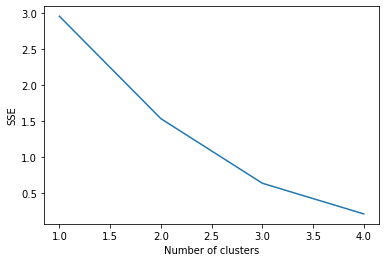

In [55]:
sse = {}
for k in range(1,5):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(nearby_business_grouped.drop('Venue',axis=1))
    nearby_business_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

### Use the optimal k value obtained from the above graph

In [56]:
#Run k-means to cluster the neighborhood into 3 clusters

# set number of clusters
kclusters = 3

nearby_business_grouped_clustering = nearby_business_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_business_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 0, 0, 0, 2, 0, 0, 0, 1, 2], dtype=int32)

In [57]:

#create a new dataframe that includes the cluster also the top 10 venues for each neighborhood

# add clustering labels
nearby_business_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nearby_business_merged = nearby_business[['Venue']]
new_state_venues = state_venues[['Venue', 'Venue Latitude', 'Venue Longitude']]

nearby_business_merged = nearby_business_merged.join(new_state_venues.set_index('Venue'), on='Venue')

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nearby_business_merged = nearby_business_merged.join(nearby_business_sorted.set_index('Venue'), on='Venue')

nearby_business_merged.drop_duplicates(subset='Venue', keep='first', inplace=True)
nearby_business_merged

,Venue,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
4,Necklace Road,17.419384,78.465307,0,Hotel,Indian Restaurant,Sandwich Place,Restaurant,Café,Fast Food Restaurant,Boat or Ferry,Coffee Shop,Donut Shop,Food Court
35,Lamakaan,17.421017,78.447474,0,Indian Restaurant,Coffee Shop,Hotel,Fast Food Restaurant,Café,BBQ Joint,Shopping Mall,Sandwich Place,Bookstore,Restaurant
126,Rain Lounge,17.425615,78.420337,0,Café,Indian Restaurant,Asian Restaurant,Sandwich Place,Restaurant,Dessert Shop,Bakery,Fast Food Restaurant,Food Truck,Breakfast Spot
175,KBR Park,17.425369,78.425063,0,Café,Breakfast Spot,Clothing Store,Asian Restaurant,Dessert Shop,Italian Restaurant,Fast Food Restaurant,Diner,Spa,Electronics Store
221,Qutub Shahi Tombs,17.394737,78.409919,0,Café,Asian Restaurant,Fast Food Restaurant,Restaurant,Pizza Place,Diner,Vegetarian / Vegan Restaurant,Department Store,Deli / Bodega,Coffee Shop
230,Heart Cup Coffee,17.459794,78.368608,0,Indian Restaurant,Café,Restaurant,BBQ Joint,Food Court,Department Store,Fast Food Restaurant,Diner,Donut Shop,Breakfast Spot
286,Medak Church,18.052768,78.266855,2,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Café,Breakfast Spot,Donut Shop
572,Thousand Pillar Temple,18.004263,79.574852,2,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Café,Breakfast Spot,Donut Shop
632,Bhel Township,17.495007,78.303459,1,Breakfast Spot,Café,Diner,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Vegetarian / Vegan Restaurant,Spa
877,Ramoji Film City,17.309839,78.681879,1,Restaurant,Food Truck,Vegetarian / Vegan Restaurant,Café,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Breakfast Spot


## Visualize Clusters

In [58]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
#import warnings
#warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [59]:
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_business_merged['Venue Latitude'], nearby_business_merged['Venue Longitude'], nearby_business_merged['Venue'], nearby_business_merged['Cluster Labels']):
    if not math.isnan(cluster):
        label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)],
            fill=True,
            fill_color=rainbow[int(cluster)],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analyze Clusters
### Analyze each cluster and determine the businesses that distinguish each cluster.

#### Cluster 1

In [60]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 0, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
4,Necklace Road,Hotel,Indian Restaurant,Sandwich Place,Restaurant,Café,Fast Food Restaurant,Boat or Ferry,Coffee Shop,Donut Shop,Food Court
35,Lamakaan,Indian Restaurant,Coffee Shop,Hotel,Fast Food Restaurant,Café,BBQ Joint,Shopping Mall,Sandwich Place,Bookstore,Restaurant
126,Rain Lounge,Café,Indian Restaurant,Asian Restaurant,Sandwich Place,Restaurant,Dessert Shop,Bakery,Fast Food Restaurant,Food Truck,Breakfast Spot
175,KBR Park,Café,Breakfast Spot,Clothing Store,Asian Restaurant,Dessert Shop,Italian Restaurant,Fast Food Restaurant,Diner,Spa,Electronics Store
221,Qutub Shahi Tombs,Café,Asian Restaurant,Fast Food Restaurant,Restaurant,Pizza Place,Diner,Vegetarian / Vegan Restaurant,Department Store,Deli / Bodega,Coffee Shop
230,Heart Cup Coffee,Indian Restaurant,Café,Restaurant,BBQ Joint,Food Court,Department Store,Fast Food Restaurant,Diner,Donut Shop,Breakfast Spot


#### Cluster 2

In [61]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 1, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
632,Bhel Township,Breakfast Spot,Café,Diner,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Vegetarian / Vegan Restaurant,Spa
877,Ramoji Film City,Restaurant,Food Truck,Vegetarian / Vegan Restaurant,Café,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Breakfast Spot


#### Cluster 3

In [62]:
nearby_business_merged.loc[nearby_business_merged['Cluster Labels'] == 2, nearby_business_merged.columns[[0] + list(range(4, nearby_business_merged.shape[1]))]]

,Venue,1st Most Common Business,2nd Most Common Business,3rd Most Common Business,4th Most Common Business,5th Most Common Business,6th Most Common Business,7th Most Common Business,8th Most Common Business,9th Most Common Business,10th Most Common Business
286,Medak Church,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Café,Breakfast Spot,Donut Shop
572,Thousand Pillar Temple,Indian Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop,Department Store,Deli / Bodega,Coffee Shop,Clothing Store,Café,Breakfast Spot,Donut Shop
